In [ ]:
class sklearn.tree.DecisionTreeRegressor (criterion=’mse’, splitter=’best’, max_depth=None,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)


与分类树对比：

criterion参数取值不同；
回归树种，没有标签分布是否均衡的问题，所以没有目标权重的参数；
属性及接口都和分类树的功能一模一样；但是实现方式略有不同

### criterion 参数：回归树衡量分枝质量的指标   
支持的标准有三种：    
1）criterion=“mse”：使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失     
2）criterion=“friedman_mse”：使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差     
3）criterion=“mae”：使用绝对平均误差MAE（mean absolute error），这种指标使用叶节点的中值来最小化L1损失     


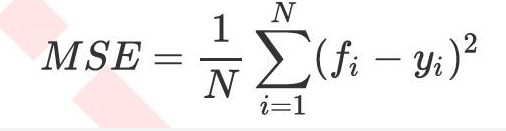

其中N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。所以MSE的本质，其实是样本真实数据与回归结果的差异。**在回归树中，MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡量回归树回归质量的指标**，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作为我们的评估（在分类树中这个指标是score代表的预测准确率）。在回归中，我们追求的是，MSE越小越好。   
然而，**回归树的接口score返回的是R平方，并不是MSE。**R平方被定义如下：   
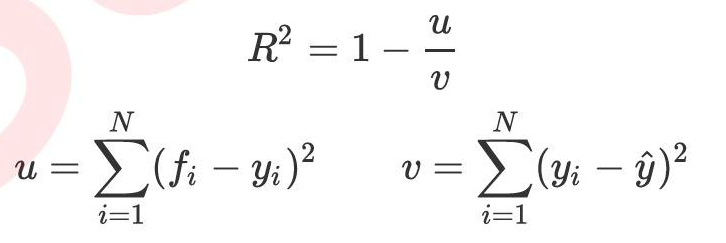

其中u是残差平方和（MSE * N），v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi是样本点i实际的数值标签。y帽是真实数值标签的平均数。R平方可以为正为负（如果模型的残差平方和远远大于模型的总平方和，模型非常糟糕，R平方就会为负），而均方误差永远为正。

值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）**。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。